In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Loading data
data = pd.read_csv("EURUSDH1_2010_2022.csv",delimiter=",")
# trade list
trades = data.loc[data['profit'] != 0]
trades.columns

Index(['Unnamed: 0', 'Datetime', 'Open', 'High', 'Low', 'Close', 'EMA_value_6',
       'CCI_3', 'CCI_12', 'CCI_18', 'CCI_24', 'CCI_30', 'ADX', 'RSI_12',
       'RSI_14', 'RSI_18', 'RSI_24', 'RSI_30', 'macd', 'macdsignal',
       'macdhist', 'Bolinger_upper', 'Bolinger_middle', 'Bolinger_lower',
       'ATR', 'threeinrow_type', 'move_strength', 'move_length',
       'movemen_range', 'result', 'Entry_bar', 'Entry_price', 'exit_bar',
       'close_rice', 'profit', 'exit_price_2', 'CCI_X', 'cci_spead',
       'cci_acce', 'cci_acce_avg', 'cci_acce_tag_by_row',
       'cci_acce_prob_by_row', 'cum_pnl', 'EMA6', 'distance_tf1',
       'distance_tf2', 'rational_strength', 'entry_candle',
       'distance_bollinger', 'distance_ratio', 'EMA_distance1_tag',
       'EMA_distance1_prob', 'EMA_distance_ratio_tag',
       'EMA_distance_ratio_prob', 'rational_strength_tag',
       'rational_stregth_prob', 'entry_candle_tag', 'entry_candle_prob',
       'distace_bollinger_tag', 'distace_bollinger_prob',

In [3]:
# create trade dataframe
trades = trades[['EMA_value_6','CCI_3','CCI_12', 'CCI_18', 'CCI_24', 'CCI_30','RSI_12','RSI_14',\
                 'RSI_18', 'RSI_24', 'RSI_30','ADX','move_strength','cci_acce_avg','bollinger_I','macd','threeinrow_type','result',\
                 'move_length','cci_spead', 'cci_acce','distance_tf1','distance_tf2','rational_strength','entry_candle','distance_ratio','degree']]

trades = trades[['EMA_value_6','CCI_12','RSI_12','ADX','move_strength','cci_acce_avg','bollinger_I','macd','threeinrow_type','result',\
                 'move_length', 'cci_acce','distance_tf1','distance_tf2','rational_strength','entry_candle','distance_ratio','degree']]
#drop null values
trades = trades.dropna()

#drop inf rows
trades = trades[~trades.isin([np.nan, np.inf, -np.inf]).any(1)]

In [4]:
#label encoding
type_encoder = preprocessing.LabelEncoder()
trades['threeinrow_type'] = type_encoder.fit_transform(trades['threeinrow_type'])
types =list(type_encoder.classes_)
coded_types = type_encoder.transform(types)
print(f'types are {types} which is encoded as {coded_types}')


type_encoder = preprocessing.LabelEncoder()
trades['result'] = type_encoder.fit_transform(trades['result'])
result =list(type_encoder.classes_)
coded_result = type_encoder.transform(result)
print(f'results are {result} which is encoded as {coded_result}')

types are ['bearish_3inrow', 'bullish_3inrow'] which is encoded as [0 1]
results are ['sl_hit', 'tp_hit'] which is encoded as [0 1]


In [5]:
# correct data types
trades['result'] = trades['result'].astype(np.int64)
trades['threeinrow_type'] = trades['threeinrow_type'].astype(np.int64)

#Data grouping
trades_bearish = trades[trades['threeinrow_type'] == 0].drop('threeinrow_type',axis=1)
trades_bullish = trades[trades['threeinrow_type'] == 1].drop('threeinrow_type',axis=1)

In [6]:
# correlation analysis for bullish and bearish trades
bearish_corr = trades_bearish.corr()
bullish_corr = trades_bullish.corr()

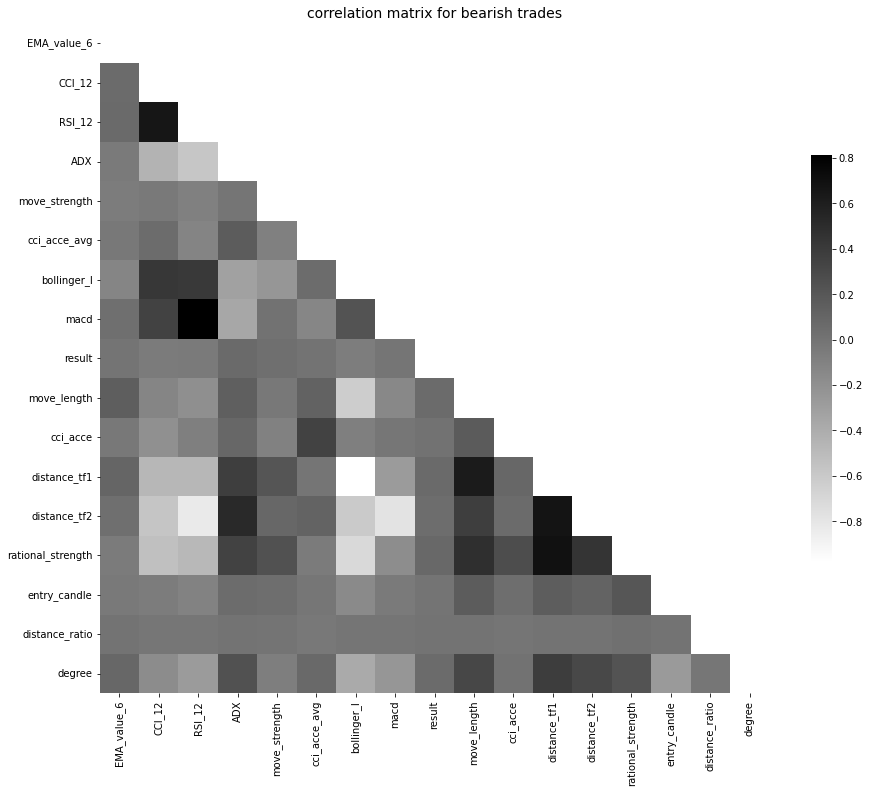

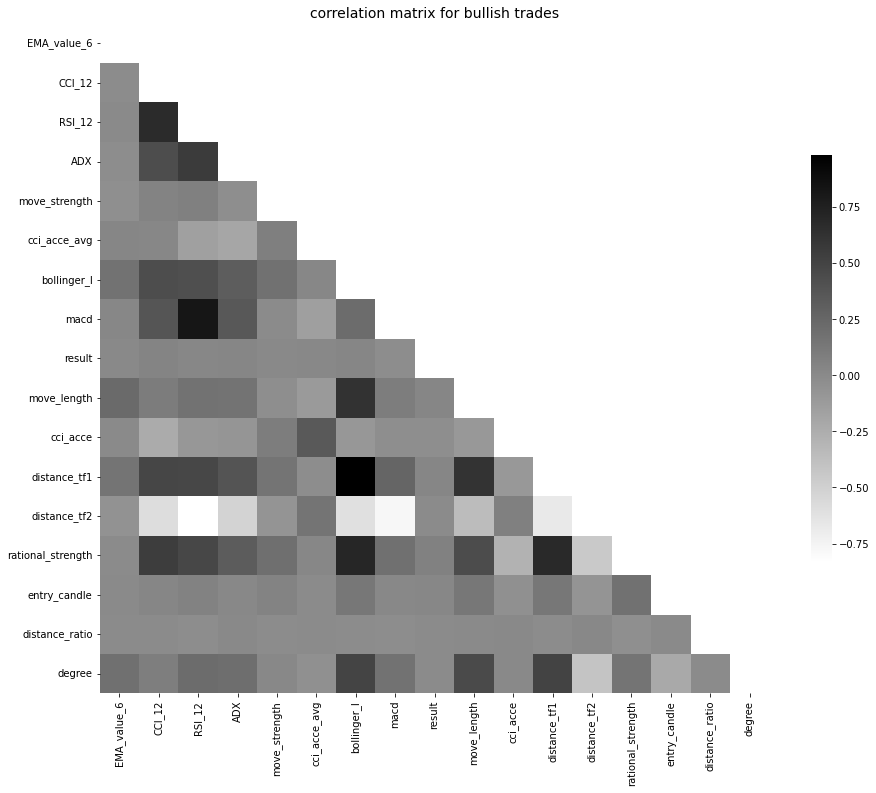

In [7]:
# create correlaton matrix heatmap
fig = plt.figure(figsize=(15, 25))
mask=np.zeros_like(bearish_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(bearish_corr,
            xticklabels=bearish_corr.columns,
            yticklabels=bearish_corr.columns,
            square=True,mask=mask,
            cbar_kws={"shrink": 0.3},
           cmap="binary")
plt.title("correlation matrix for bearish trades",fontsize=14)
plt.show()

mask=np.zeros_like(bullish_corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(15, 25))
sns.heatmap(bullish_corr,
            xticklabels=bullish_corr.columns,
            yticklabels=bullish_corr.columns,
            square=True,mask=mask,
            cbar_kws={"shrink": 0.3},
           cmap="binary")
plt.title("correlation matrix for bullish trades",fontsize=14)
plt.show()

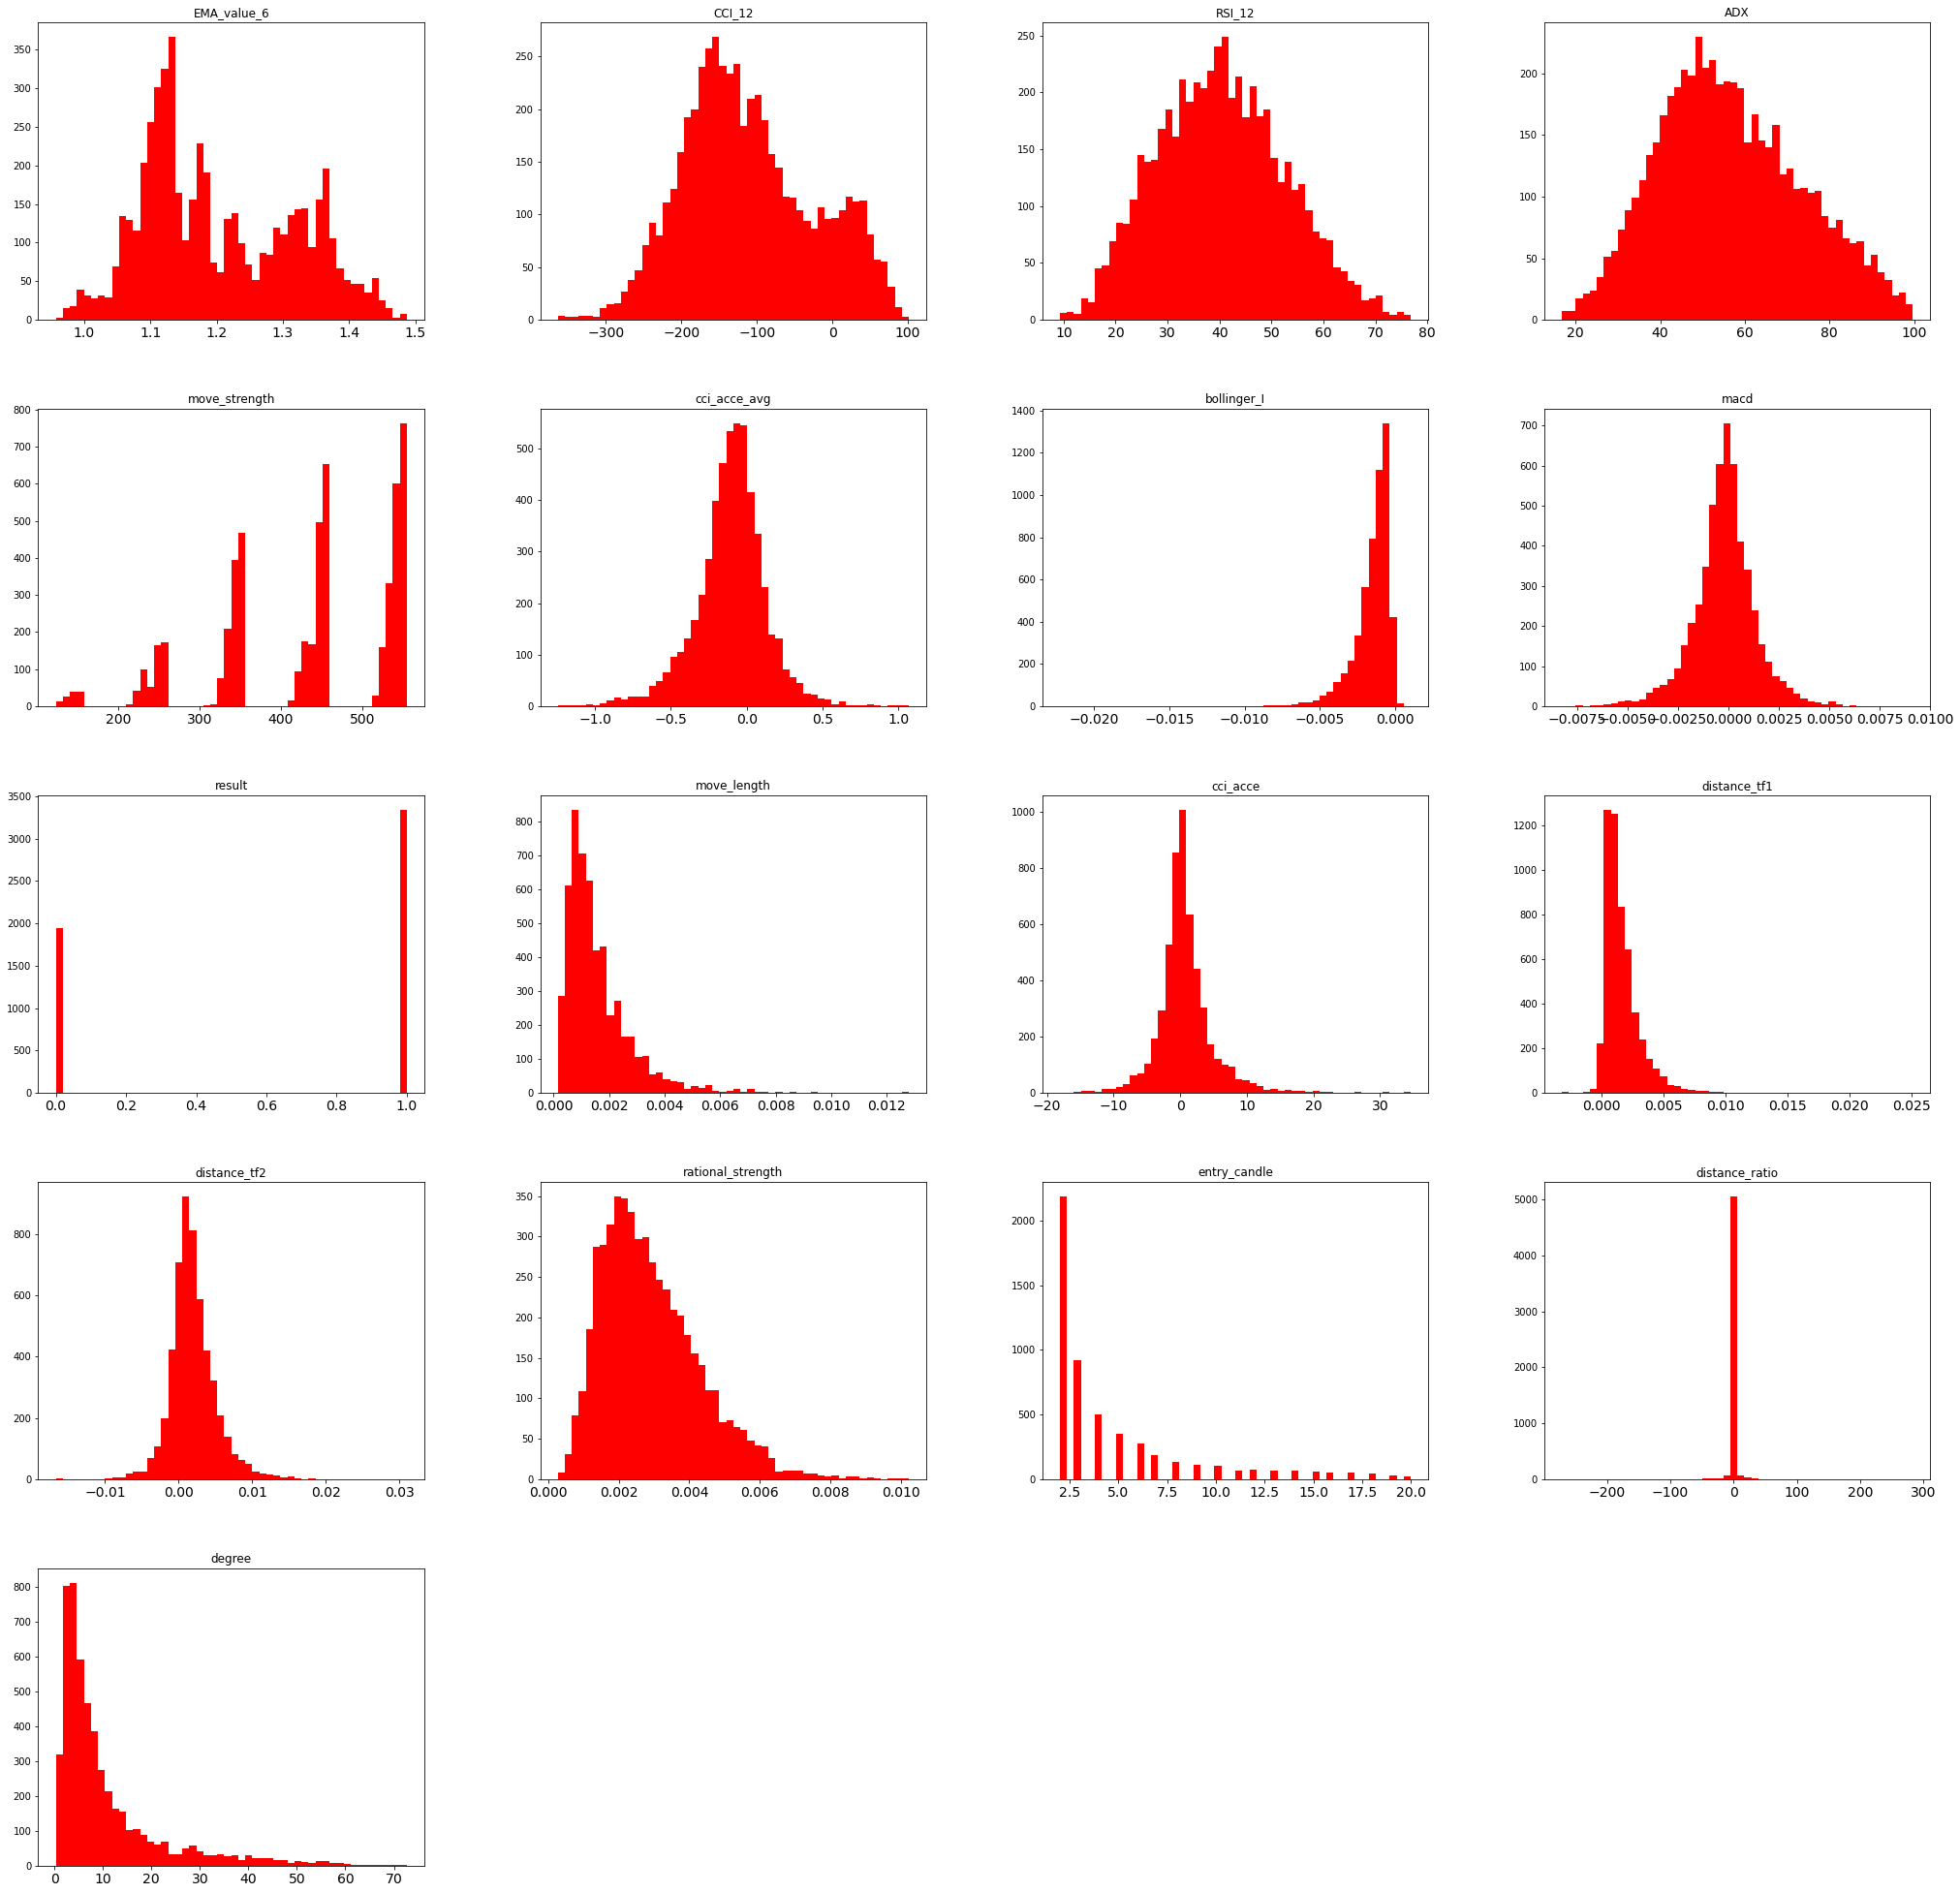

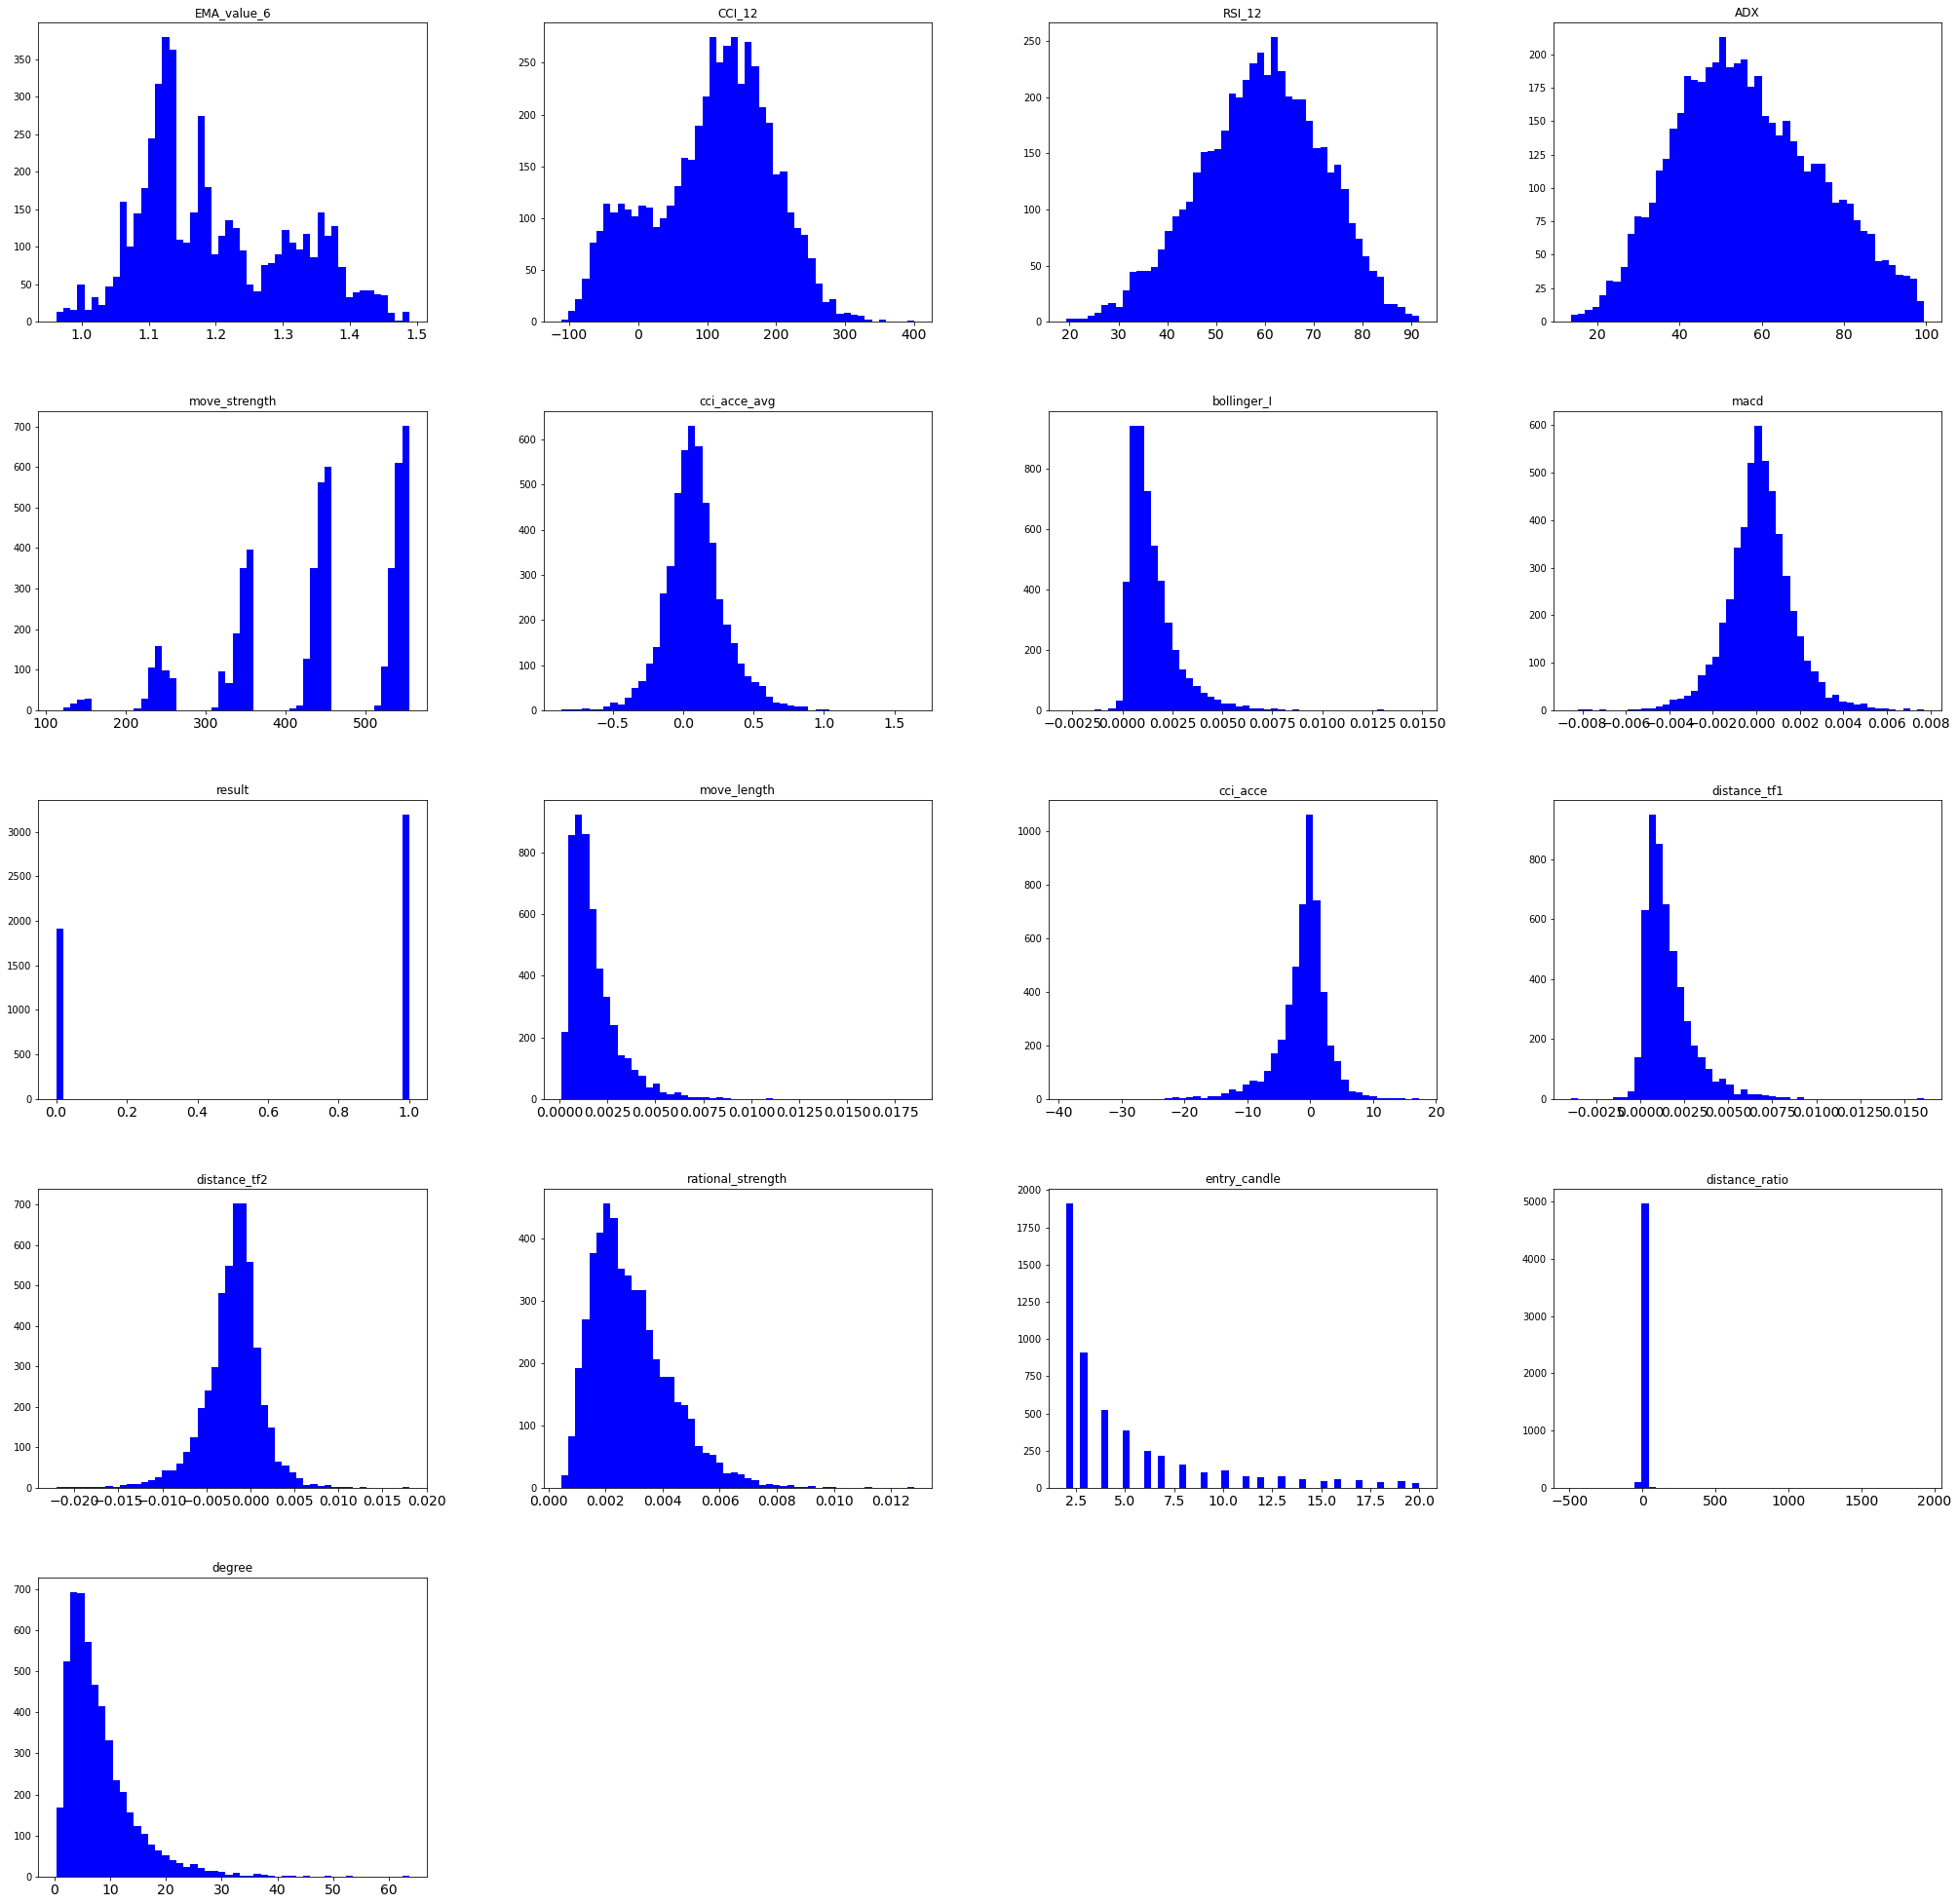

In [8]:
# feature distribution analysis

trades_bearish.hist(figsize=(35,35),grid =False,bins=50,xlabelsize=14,color='red')
plt.title("Feature distribution analysis for Bearish trades")
plt.show()

trades_bullish.hist(figsize=(35,35),grid =False,bins=50,xlabelsize=14,color='blue')
plt.title("Feature distribution analysis for Bulish trades")
plt.show()

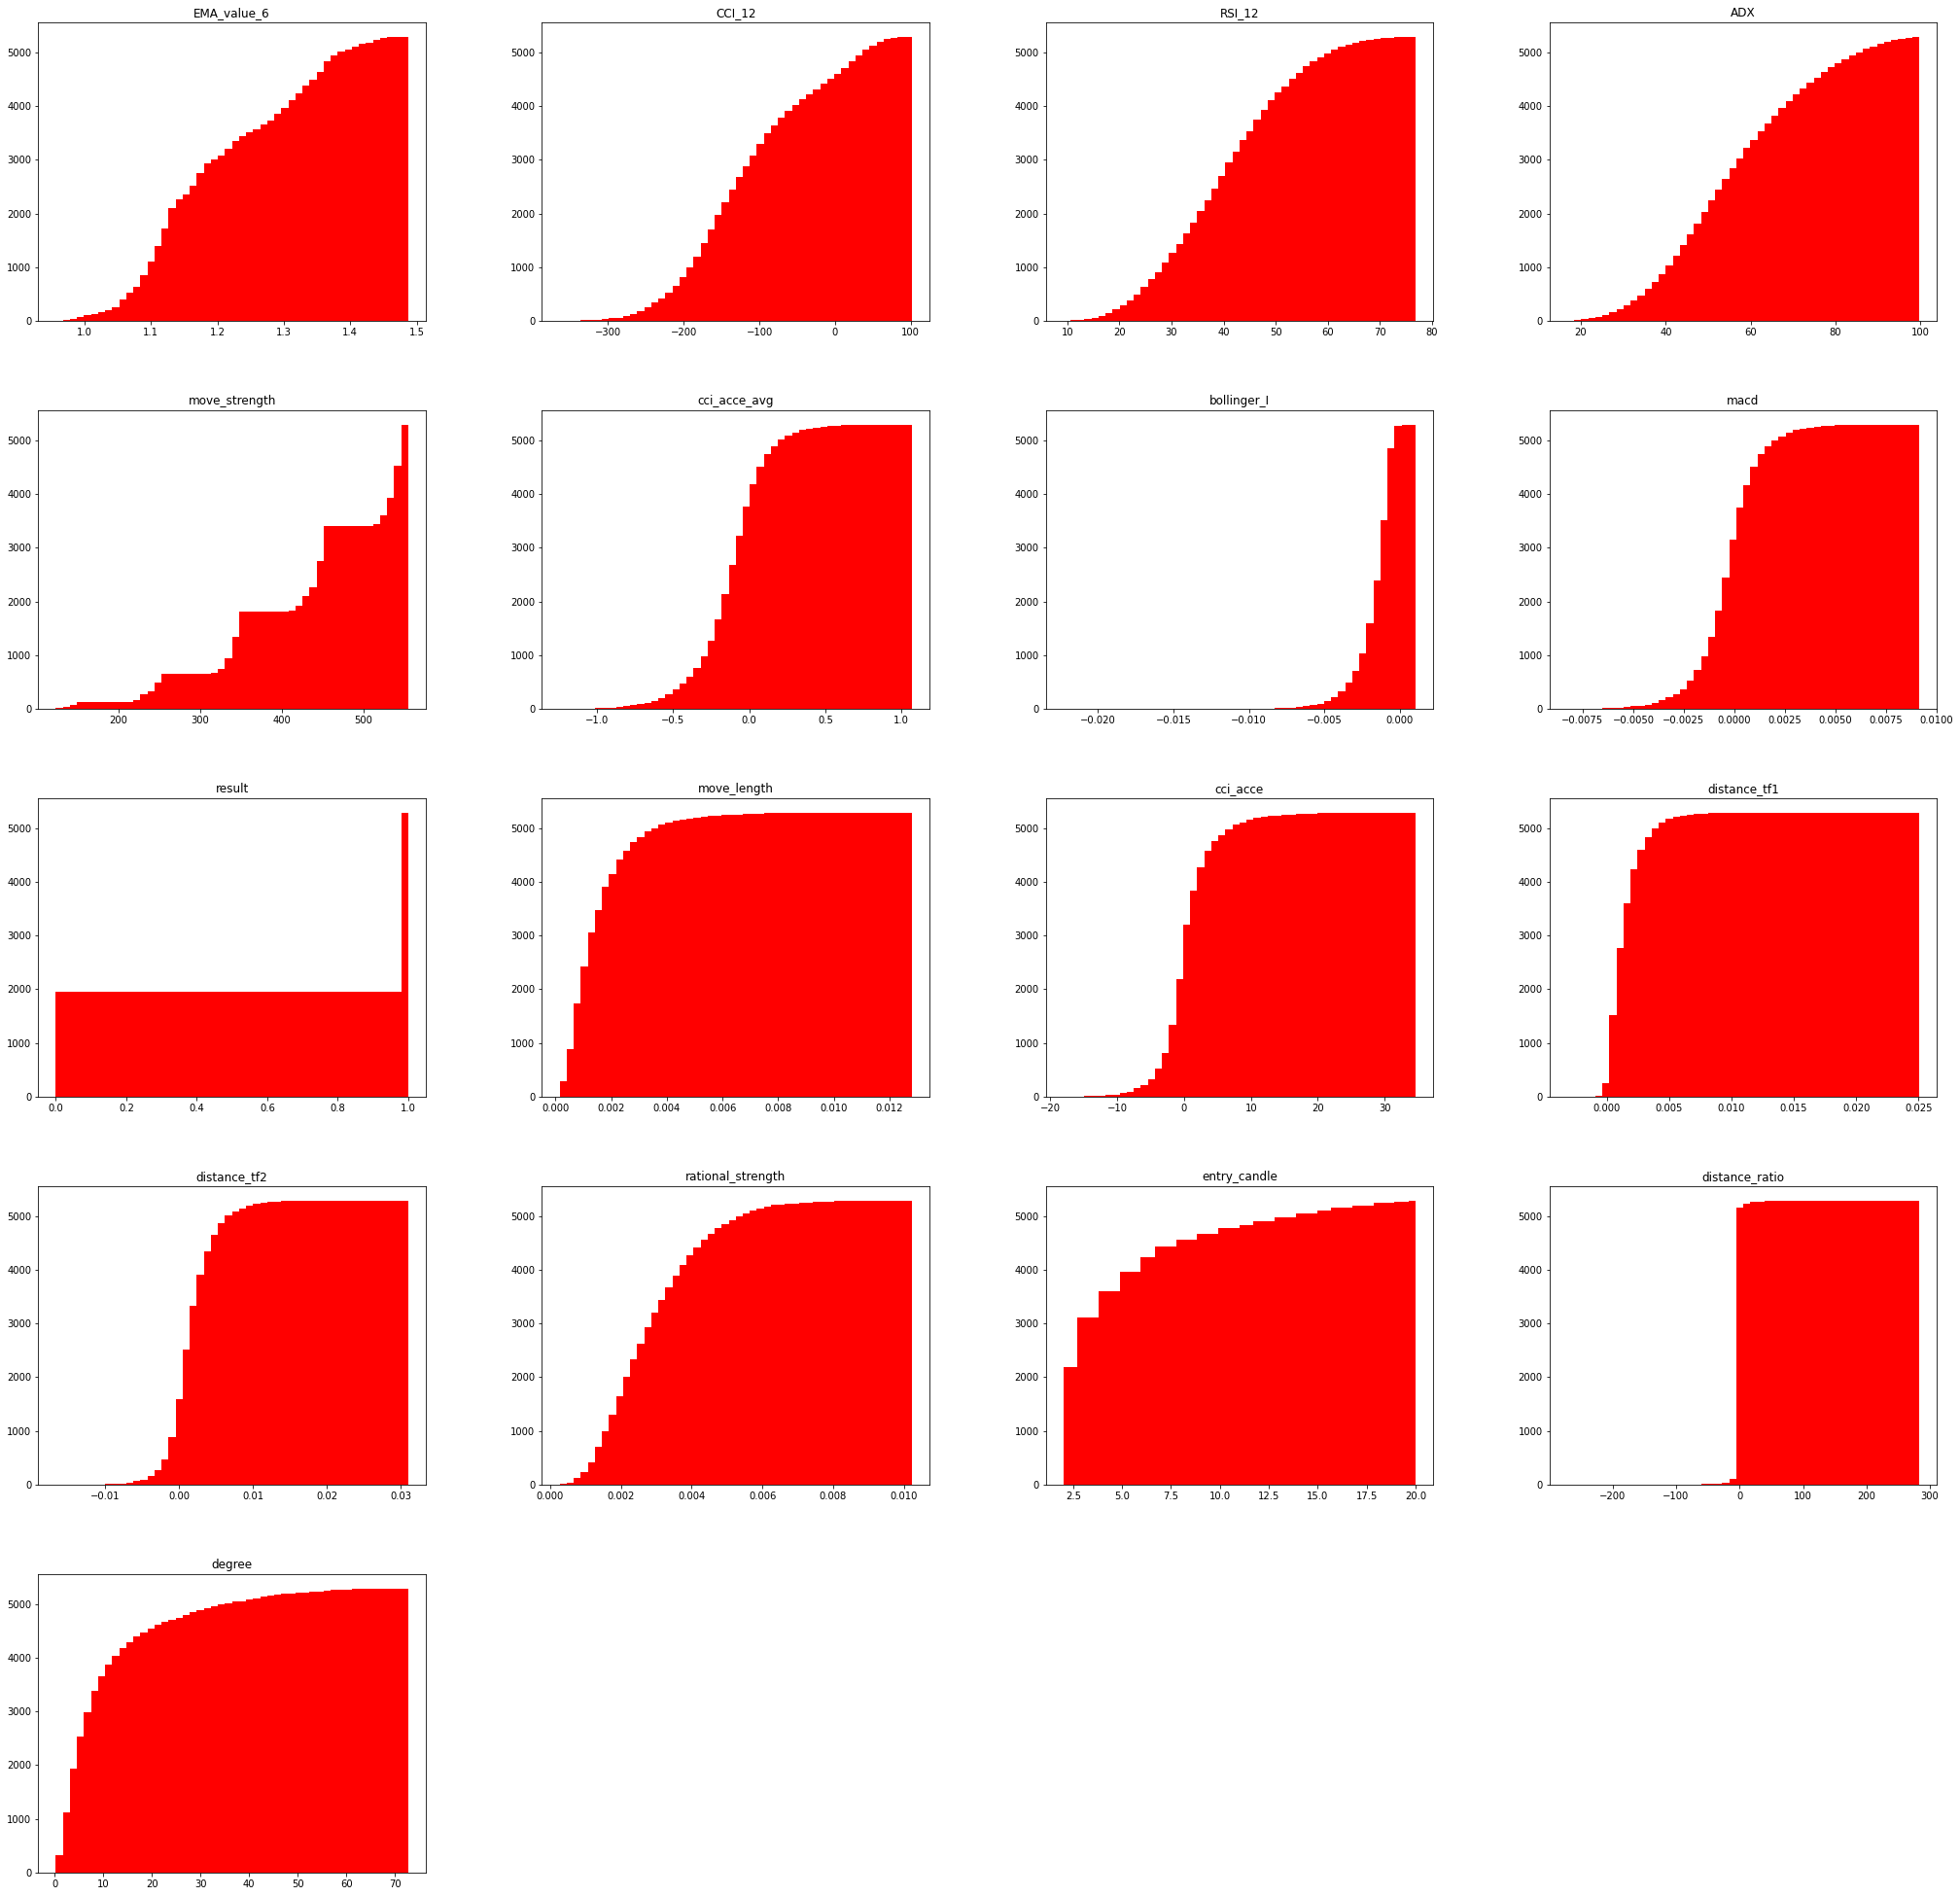

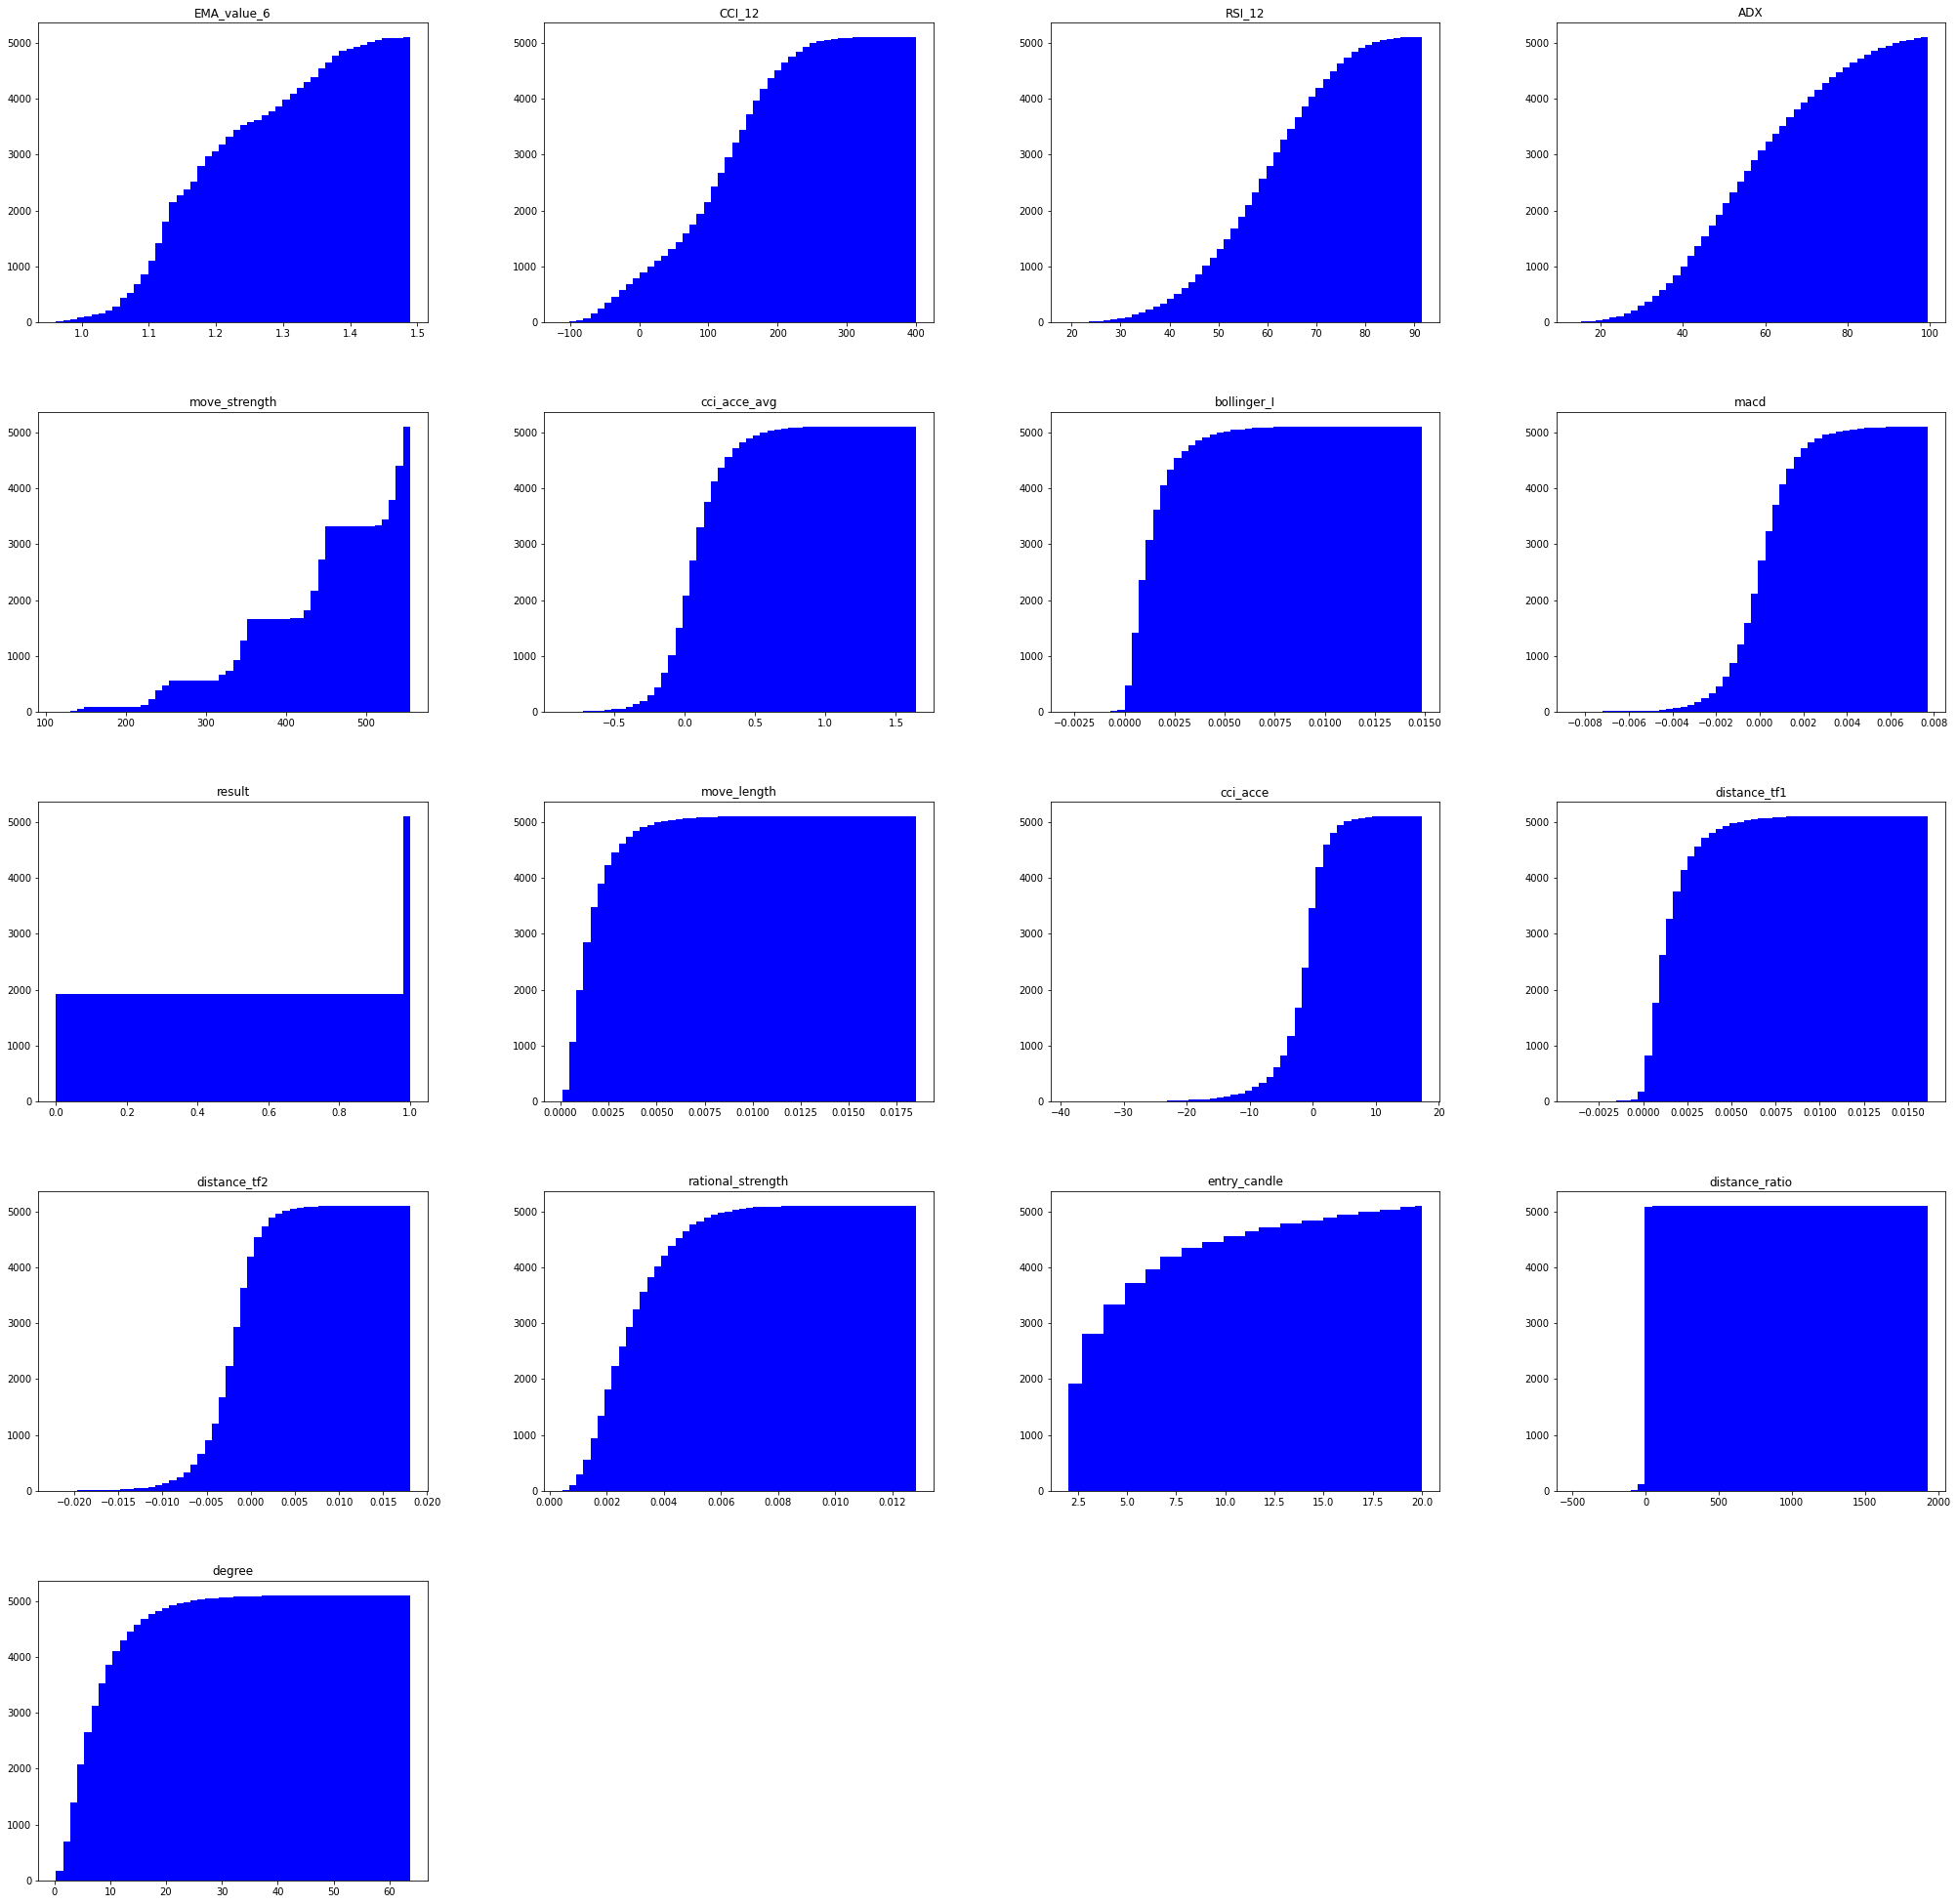

In [9]:
trades_bearish.hist( figsize=(35,35),grid =False,bins=50,cumulative = True,color='red' )
plt.show()

trades_bullish.hist( figsize=(35,35),grid =False,bins=50,cumulative = True,color='blue' )
plt.show()


In [10]:
%store trades_bearish
%store trades_bullish

Stored 'trades_bearish' (DataFrame)
Stored 'trades_bullish' (DataFrame)


In [12]:
trades_bearish.columns


Index(['EMA_value_6', 'CCI_12', 'RSI_12', 'ADX', 'move_strength',
       'cci_acce_avg', 'bollinger_I', 'macd', 'result', 'move_length',
       'cci_acce', 'distance_tf1', 'distance_tf2', 'rational_strength',
       'entry_candle', 'distance_ratio', 'degree'],
      dtype='object')